## ML Assignment 4
------

Design a housing price predictor taking only the following features.
- Floor area (plot size)
- Number of bedrooms
- Number of bathrooms 

Takeing 70% for designing the predictor and 30% for validating the design

 #### (a) [Using Normal Equation](#Question-1)

### 1) Importing the required files.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2) Reading the csv data and sectioning what is necessary 

In [2]:
hp = pd.read_csv('Housing_Price_data_set.csv')
hp1 = hp[['lotsize', 'bedrooms', 'bathrms', 'price']]
hp1.head()

,lotsize,bedrooms,bathrms,price
0,5850,3,1,42000.0
1,4000,2,1,38500.0
2,3060,3,1,49500.0
3,6650,3,1,60500.0
4,6360,2,1,61000.0


### 4) Training and Validation Set (70 : 30)

In [3]:
hp_train = hp1.iloc[:383]
hp_val = hp1.iloc[383:]

### 5) Visualize the data

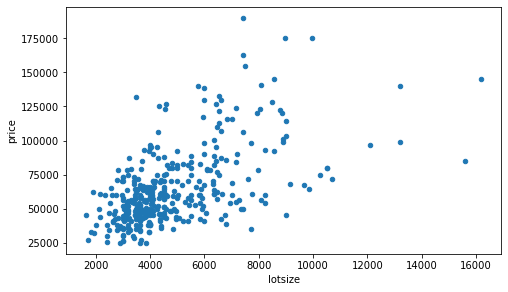

In [4]:
figure, ax = plt.subplots(1, figsize=(7,4))
hp_train.plot(kind='scatter',x='lotsize',y='price',ax=ax)

figure.tight_layout(pad=0.5)

## Question 1
a) Normal equations  with  and without regularization and compare their performances in terms of % error in prediction.

## Initializing the matrices for Normal equation.

In [5]:
m = hp_train.shape[0]
X = np.concatenate((np.ones((m, 1)), np.array(hp_train.iloc[:, 0:3])), axis=1)
Y = np.array(hp_train.iloc[:, 3])

m_val = hp_val.shape[0]
X_val = np.concatenate((np.ones((m_val, 1)), np.array(hp_val.iloc[:, 0:3])), axis=1)
Y_val = np.array(hp_val.iloc[:, 3])

print(X.shape, Y.shape)
print(X_val.shape, Y_val.shape)

(383, 4) (383,)
(163, 4) (163,)


## Feature scaling

### Scaling plot Size to between -2 to 5

In [6]:
muX = np.mean(X[:,1])
sigmaX = (np.mean((X[:,1] - muX)**2))**(1/2)

muY = np.mean(Y)
sigmaY = (np.mean((Y - muY)**2))**(1/2)

X[:,1] = (X[:,1] - muX) / sigmaX
X_val[:,1] = (X_val[:,1] - muX) / sigmaX

------

## Calculating the Weights using Normal Equation (no Regularization)

In [7]:
inverse = np.linalg.inv(np.dot(X.T, X))

W = np.dot(inverse, np.dot(X.T, Y))         # Normal EQ.

print(W.shape)
print(W)

(4,)
[23950.22814569 12626.39105235  5514.6731898  18764.23913149]


## Mean Average Percentage Error - MAPE 

In [8]:
Y_predicted = np.dot(X_val, W)

J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error =", percentage)

Percent error = 18.742


------

## Calculating the Weights using Normal Equation (with Regularization)

In [9]:
E = np.eye(4)
E[0, 0] = 0                     # regularization term
lambda_ = 10
inverse = np.linalg.inv(np.dot(X.T, X) + lambda_*E)     # regularized 

W = np.dot(inverse, np.dot(X.T, Y))                     # Normal EQ + regularzation.

print(W.shape)
print(W)

(4,)
[25542.6129996  12487.53792415  5714.30988413 17056.93043301]


## Mean Average Percentage Error - MAPE 

In [10]:
Y_predicted = np.dot(X_val, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error =", percentage)

Percent error = 18.55
